In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
#from cartopy import config
import cartopy.crs as ccrs
import cartopy
import pandas as pd
from scipy.stats.mstats import linregress

In [2]:
files=sorted(glob.glob('/home/z5241410/Desktop/UNSW/Calipso_data/full_data/Map_OPAQ330m*.nc'))
ds=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [3]:
clt_opz=ds['cltcalipso_opaque_z']
opz=ds['zopaque']
diff=(clt_opz)-opz
visible_depth=diff*2

In [4]:
climatology=visible_depth.groupby('time.month').mean('time')
anomalies=visible_depth.groupby('time.month')-climatology

In [5]:
nino=np.array([24.86, 25.08,26.07, 26.83 ,27.09 ,27.04 ,26.99, 26.72 ,26.47 ,26.37 ,26.25, 25.74, 25.66 ,25.96 ,26.59 ,27.47 ,27.99 ,28.04 ,27.78 ,27.42 ,27.40 ,27.60 ,28.16, 28.34, 28.07 ,28.01 ,28.18 ,28.20 ,27.71 ,27.04 ,26.22 ,25.47 ,25.12 ,25.03 ,25.06, 25.00, 25.00 ,25.64 ,26.36 ,27.05 ,27.41 ,27.35 ,26.87 ,26.21 ,25.92 ,25.67 ,25.52, 25.54, 25.67 ,26.08 ,26.67 ,27.32 ,27.61 ,27.75 ,27.54 ,27.32 ,27.10 ,26.98 ,26.86, 26.34, 26.01 ,26.24 ,27.03 ,27.57 ,27.53 ,27.30 ,26.91 ,26.47 ,26.54 ,26.52 ,26.56, 26.43, 26.05 ,26.14 ,27.00 ,27.90 ,28.25 ,27.96 ,27.23 ,26.82 ,27.01 ,27.16 ,27.46 ,27.31, 27.05 ,27.17 ,27.75 ,28.52 ,28.85 ,28.90 ,28.75 ,28.79 ,28.93 ,29.08 ,29.42, 29.26, 29.11 ,28.90 ,28.72 ,28.23 ,27.69 ,26.82 ,26.28 ,26.14 ,25.98 ,25.94, 26.10, 26.12 ,26.67 ,27.32 ,28.03 ,28.30 ,28.06 ,27.54 ,26.70 ,26.29 ,26.15 ,25.74])

In [124]:
def correlation(x): 
    x = np.ma.masked_invalid(x) 
    corr_value=np.corrcoef(x,nino)[0][1]
    if corr_value is None: # All the points are masked out 
        return [np.nan] 
    return [corr_value]

In [125]:
time_axis = 0
cor= np.apply_along_axis(correlation, time_axis, anomalies)
cor

/home/z5241410/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [126]:
cor.shape

(1, 90, 180)

In [127]:
anomalies
latitude=anomalies['latitude']
longitude=anomalies['longitude']

In [128]:
cor1=xr.DataArray(data=cor[0,:,:])
fin_corr=xr.DataArray(data=cor1,coords=[latitude,longitude],dims=['latitude','longitude'])

/home/z5241410/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/home/z5241410/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


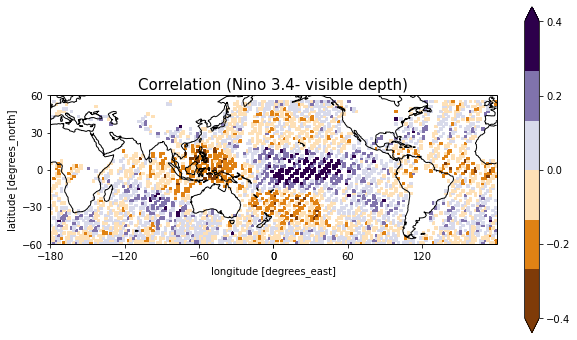

In [129]:
lon = np.linspace(-180, 180,180)
lat = np.linspace(-90, 90,90)
lon2d, lat2d = np.meshgrid(lon, lat)
plt.figure(figsize=(10,6))

ax=plt.subplot(1,1, 1,projection=ccrs.PlateCarree(central_longitude=180.0))
ax.coastlines()
#ax.set_global()
ax.set_extent([-179, 180, -60, 60],crs=ccrs.PlateCarree())
ax.set_xticks([-180,-120,-60,0,60,120,180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -30, 0, 30, 60], crs=ccrs.PlateCarree())


fin_corr.plot(cmap=plt.cm.get_cmap('PuOr',6),transform=ccrs.PlateCarree(),vmin=-0.4, vmax=0.4,cbar_kwargs={'extend':'both','ticks':[-0.4,-0.2,0,0.2,0.4]})
plt.title('Correlation (Nino 3.4- visible depth)',size=15)
plt.savefig('vis_dep_nino_corr.png', dpi=300, bbox_inches='tight')
